In [50]:
# https://github.com/tallesfelix/directions-with-osm-networkx/blob/master/Creating%20routes%20with%20networkx%20and%20ipyleaflet.ipynb
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString, mapping
import geopandas as gpd
from ipyleaflet import *

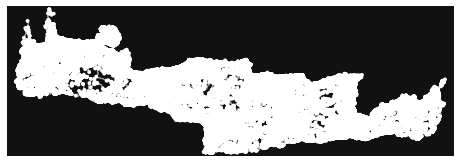

In [64]:
place_name = "Creta, Greece"
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph)

In [65]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes

,y,x,osmid,highway,geometry
29438091,35.330069,25.209260,29438091,motorway_junction,POINT (25.20926 35.33007)
29438245,35.326929,25.296339,29438245,NaN,POINT (25.29634 35.32693)
29438247,35.327290,25.302006,29438247,NaN,POINT (25.30201 35.32729)
29438254,35.327167,25.305850,29438254,NaN,POINT (25.30585 35.32717)
29438288,35.329280,25.352247,29438288,NaN,POINT (25.35225 35.32928)
...,...,...,...,...,...
8187042937,35.513471,23.908327,8187042937,NaN,POINT (23.90833 35.51347)
8224256546,35.344195,23.904962,8224256546,NaN,POINT (23.90496 35.34419)
8224256550,35.344333,23.905247,8224256550,NaN,POINT (23.90525 35.34433)
8224256554,35.344512,23.905073,8224256554,NaN,POINT (23.90507 35.34451)


In [69]:
center = (35.513471, 23.908327)
m = Map(center=center, basemap=basemaps.CartoDB.Positron, zoom=10)
m

Map(center=[35.513471, 23.908327], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [70]:
edges

,osmid,oneway,lanes,highway,maxspeed,length,geometry,ref,name,bridge,service,tunnel,width,junction,access,u,v,key
0,"[41357179, 384715939]",True,"[1, 2]",motorway_link,10,180.647,"LINESTRING (25.20926 35.33007, 25.21028 35.330...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29438091,1300140266,0
1,"[338545849, 446707724]",True,2,motorway,70,440.510,"LINESTRING (25.20926 35.33007, 25.21246 35.331...",Α90,Βόρειος Οδικός Άξονας Κρήτης,NaN,NaN,NaN,NaN,NaN,NaN,29438091,3456416540,0
2,4635372,False,3,primary,NaN,67.920,"LINESTRING (25.29634 35.32693, 25.29655 35.327...",ΕΟ90,Ηρακλείου - Αγίου Νικολάου,NaN,NaN,NaN,NaN,NaN,NaN,29438245,293987571,0
3,"[857509504, 857509505, 857509506, 384715961, 8...",False,"[3, 2, 4]",primary,NaN,349.913,"LINESTRING (25.29634 35.32693, 25.29611 35.326...",NaN,Συνδετήρια Οδός,NaN,NaN,NaN,NaN,NaN,NaN,29438245,7994868235,0
4,857509500,True,1,primary,NaN,25.158,"LINESTRING (25.29634 35.32693, 25.29637 35.326...",ΕΟ90,Ηρακλείου - Αγίου Νικολάου,NaN,NaN,NaN,NaN,NaN,NaN,29438245,7994868217,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247432,884340673,False,NaN,track,NaN,60.810,"LINESTRING (23.90525 35.34433, 23.90536 35.344...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8224256550,8224256559,0
247433,26999956,False,NaN,primary,NaN,12.835,"LINESTRING (23.90507 35.34451, 23.90511 35.34462)",NaN,Χανιά - Ομαλός,NaN,NaN,NaN,NaN,NaN,NaN,8224256554,1365941731,0
247434,26999956,False,NaN,primary,NaN,36.682,"LINESTRING (23.90507 35.34451, 23.90496 35.34419)",NaN,Χανιά - Ομαλός,NaN,NaN,NaN,NaN,NaN,NaN,8224256554,8224256546,0
247435,884340671,False,NaN,service,NaN,27.251,"LINESTRING (23.90507 35.34451, 23.90516 35.344...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8224256554,8224256550,0


In [73]:
to_marker_style = AwesomeIcon(
    name='circle',
    icon_color='white',
    marker_color='red',
    spin=False
)
from_marker = Marker(location=center)
to_marker = Marker(location=center, icon=to_marker_style)

In [74]:
def set_nearest_node(marker):
 marker.nearest_node = ox.get_nearest_node(graph, marker.location)
 return

In [75]:
path_layer_list = []
def handle_change_location(event, marker):
    event_owner = event['owner']
    event_owner.nearest_node = ox.get_nearest_node(graph, event_owner.location)
    marker.nearest_node = ox.get_nearest_node(graph, marker.location)
    
    shortest_path = nx.dijkstra_path(graph, event_owner.nearest_node, marker.nearest_node, 
                                     weight='length')
    
    if len(path_layer_list) == 1:
        m.remove_layer(path_layer_list[0])
        path_layer_list.pop()
    
    shortest_path_points = nodes.loc[shortest_path]
    path = gpd.GeoDataFrame([LineString(shortest_path_points.geometry.values)], columns=['geometry'])
    path_layer = GeoData(geo_dataframe=path, style={'color':'black', 'weight':2})
    m.add_layer(path_layer)
    path_layer_list.append(path_layer)

In [76]:
from_marker.observe(lambda event: handle_change_location(event, to_marker), 'location')
to_marker.observe(lambda event: handle_change_location(event, from_marker), 'location')

In [77]:
m.add_layer(from_marker)
m.add_layer(to_marker)
set_nearest_node(from_marker)
set_nearest_node(to_marker)
m

Map(bottom=103730.63635253906, center=[35.34130190282593, 24.333914506196553], controls=(ZoomControl(options=[…

In [60]:
type(m)

ipyleaflet.leaflet.Map